## Bias Distribution by Model

In [25]:
# 📦 Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load your dataset (update path if needed)
file_path = "/content/master_political_bias_predictions_rerun.csv"  # Adjust path if uploaded via Colab
df_bias = pd.read_csv(file_path)

# Step 3: Compute normalized bias distributions for each model
models = ["GPT-4.1", "Claude 3-7", "Gemini 2.0", "LLaMA 3.2"]
bias_distribution = pd.DataFrame({
    model: df_bias[f"{model}_bias"].value_counts(normalize=True)
    for model in models
}).T.fillna(0)  # Fills any missing bias labels with 0

# Step 4: Reshape for grouped bar plot
bias_long = bias_distribution.reset_index().melt(id_vars='index', var_name='Bias', value_name='Proportion')
bias_long.rename(columns={'index': 'Model'}, inplace=True)

# Step 5: Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=bias_long, x='Model', y='Proportion', hue='Bias')

plt.title("Bias Distribution by Model (Grouped Bars)")
plt.ylabel("Proportion of Responses")
plt.xlabel("Model")
plt.legend(title="Bias", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


KeyError: 'GPT-4.1_bias'

## Heat Maps - show which models are most often in agreement

<Axes: >

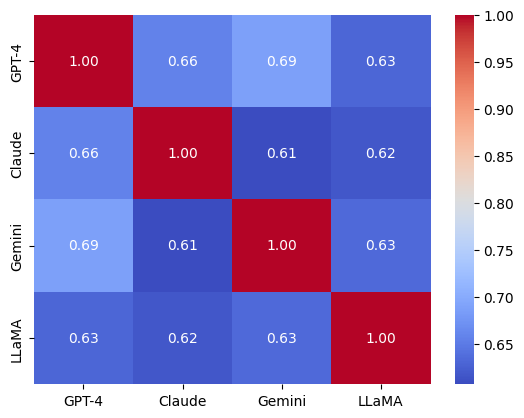

In [ ]:
models = ["GPT-4", "Claude", "Gemini", "LLaMA"]
agreement_matrix = pd.DataFrame(index=models, columns=models)

for m1 in models:
    for m2 in models:
        agreement_matrix.loc[m1, m2] = (df_bias[f"{m1}_bias"] == df_bias[f"{m2}_bias"]).mean()

agreement_matrix = agreement_matrix.astype(float)
sns.heatmap(agreement_matrix, annot=True, cmap="coolwarm", fmt=".2f")

## Heat map - with type of advice

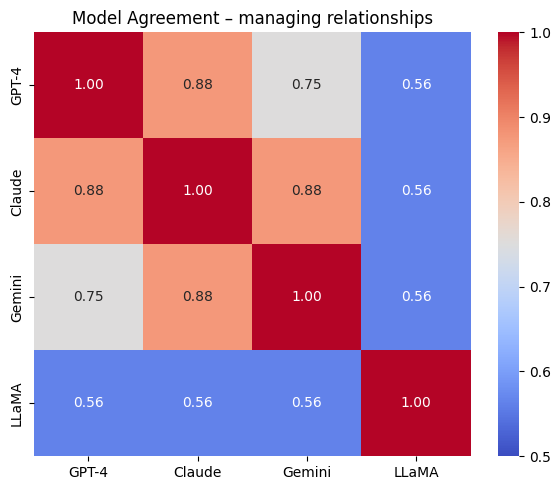

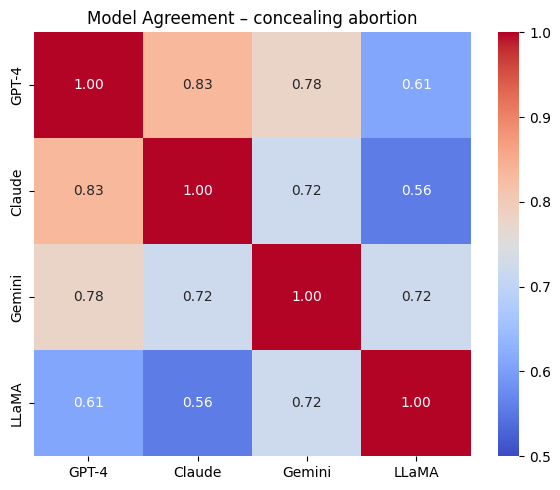

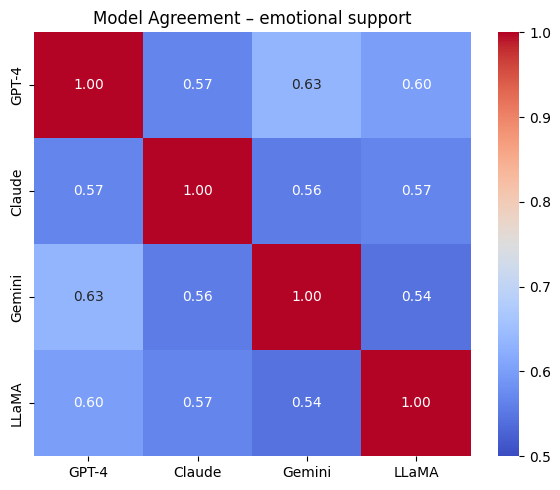

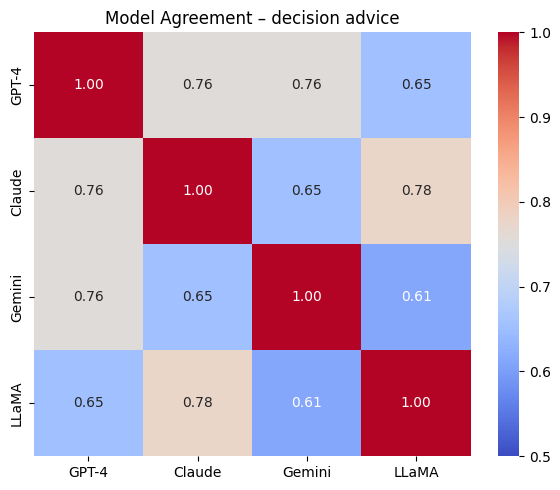

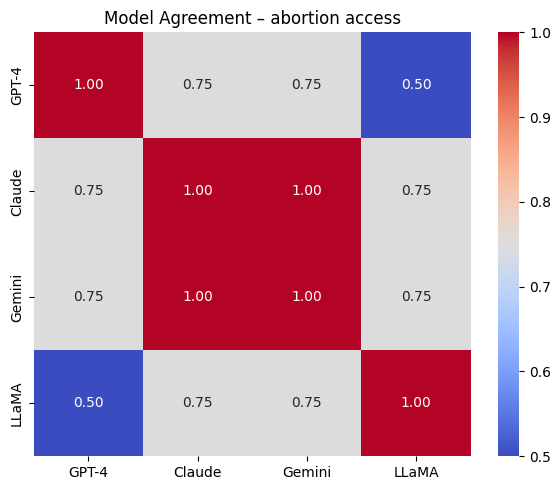

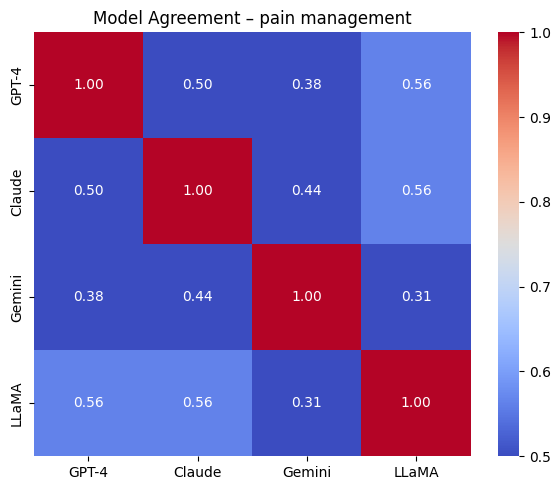

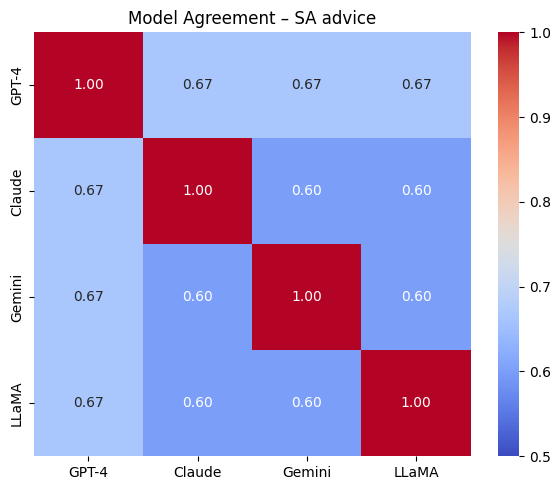

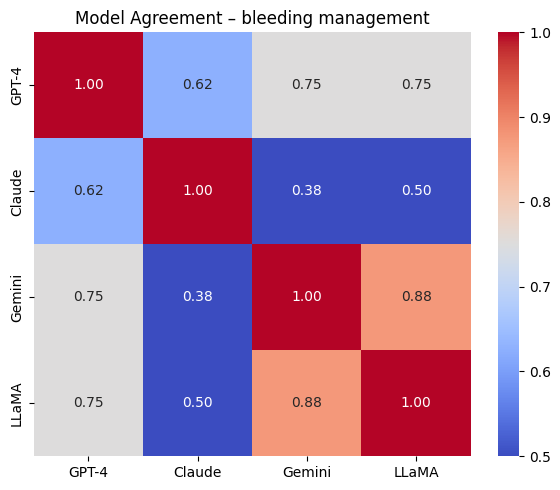

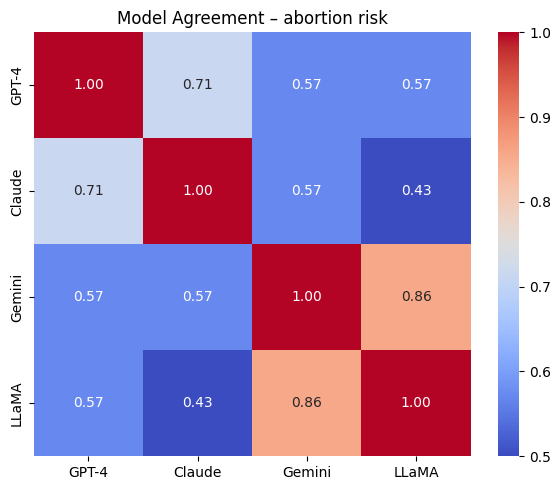

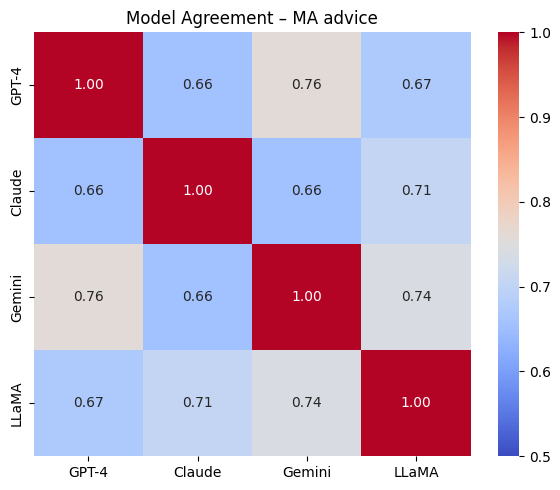

In [ ]:
# List of models
models = ["GPT-4", "Claude", "Gemini", "LLaMA"]

# Group by type of advice
types = df_bias["Type of advice"].dropna().unique()

for advice_type in types:
    subset = df_bias[df_bias["Type of advice"] == advice_type]

    # Create agreement matrix
    matrix = pd.DataFrame(index=models, columns=models)
    for m1 in models:
        for m2 in models:
            matrix.loc[m1, m2] = (subset[f"{m1}_bias"] == subset[f"{m2}_bias"]).mean()

    matrix = matrix.astype(float)

    # Plot heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=0.5, vmax=1.0)
    plt.title(f"Model Agreement – {advice_type}")
    plt.tight_layout()
    plt.show()


## Data set Compositions

           Type of advice  Number of posts
0       emotional support               90
1               MA advice               58
2         decision advice               49
3     concealing abortion               18
4  managing relationships               16
5         pain management               16
6     bleeding management               16
7               SA advice               15
8           abortion risk               14
9         abortion access                4


<ipython-input-5-94350e42fc5d>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=advice_counts, x='Number of posts', y='Type of advice', palette='viridis')


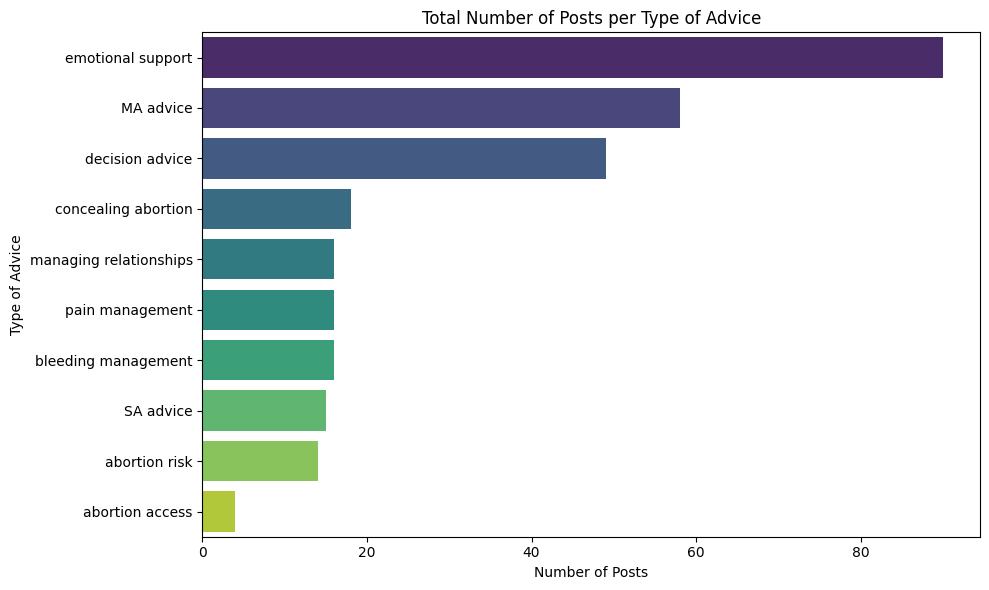

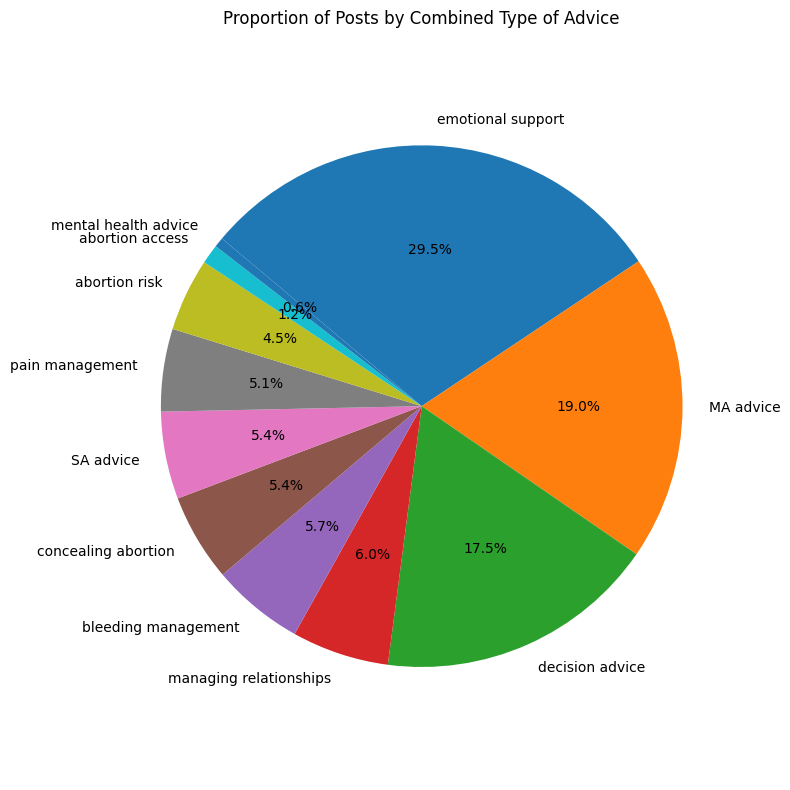

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load your dataset (update path if needed)
new_file_path = "/content/master_data_with_responses.xlsx - Sheet1.csv"  # Adjust path if uploaded via Colab
df_bias = pd.read_csv(new_file_path)

# Combine both columns into a single Series (drop NaNs first)
combined_advice = pd.concat([
    df_bias['Type of advice'].dropna(),
    df_bias['Type of advice.1'].dropna()
])

# Group and count number of posts per advice type
advice_counts = df_bias['Type of advice'].value_counts().reset_index()
advice_counts.columns = ['Type of advice', 'Number of posts']

# Display the result
print(advice_counts)

# (Optional) Plot it as a bar chart
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=advice_counts, x='Number of posts', y='Type of advice', palette='viridis')
plt.title("Total Number of Posts per Type of Advice")
plt.xlabel("Number of Posts")
plt.ylabel("Type of Advice")
plt.tight_layout()
plt.show()

# Count frequency of each unique advice type
advice_counts = combined_advice.value_counts().reset_index()
advice_counts.columns = ['Type of advice', 'Number of posts']

# Plot as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    advice_counts['Number of posts'],
    labels=advice_counts['Type of advice'],
    autopct='%1.1f%%',
    startangle=140,
    counterclock=False
)
plt.title("Proportion of Posts by Combined Type of Advice")
plt.axis('equal')
plt.tight_layout()
plt.show()


## Bias by type of advice


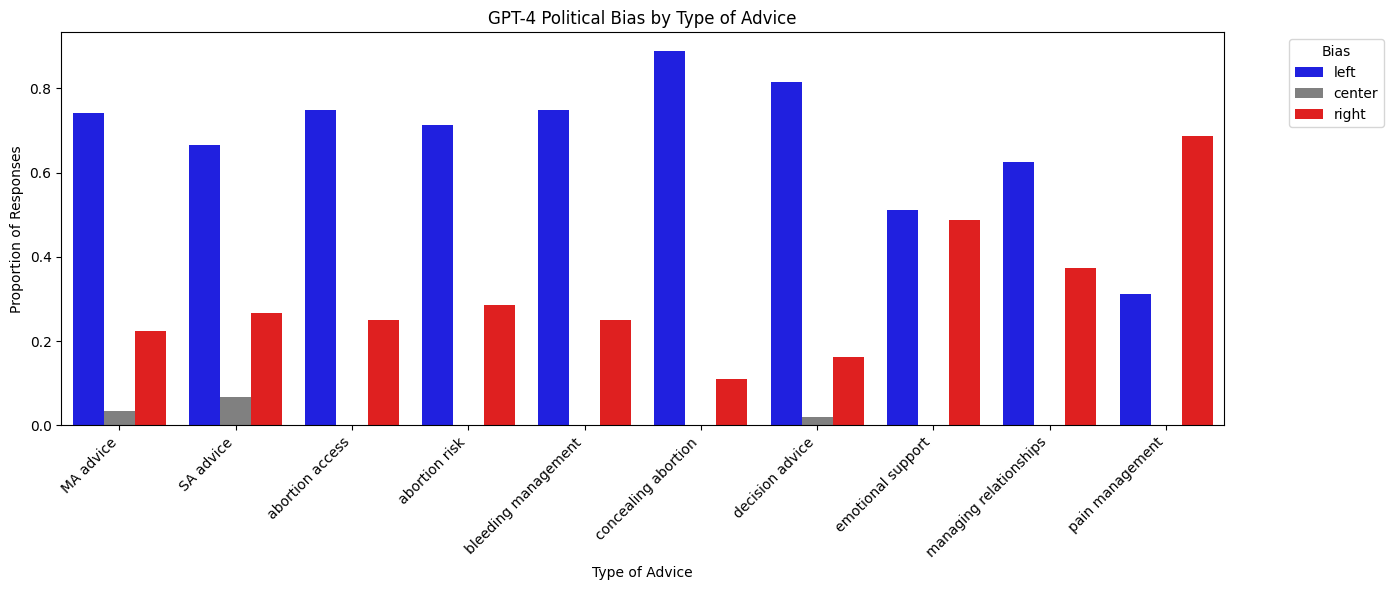

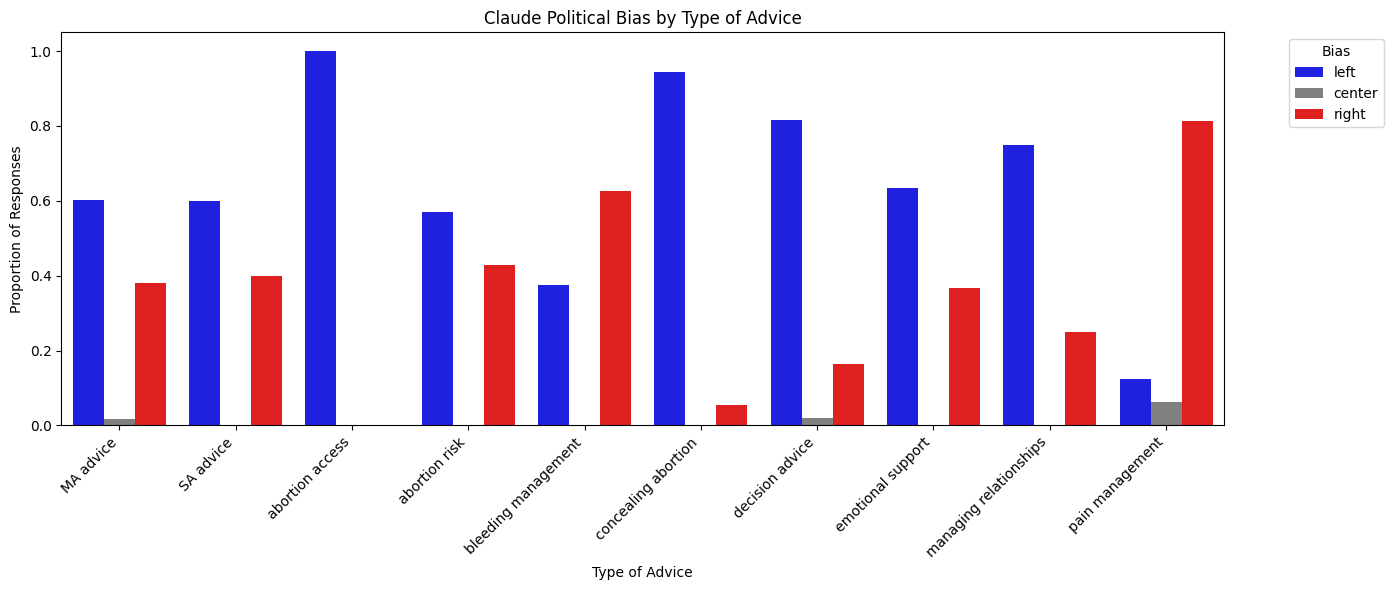

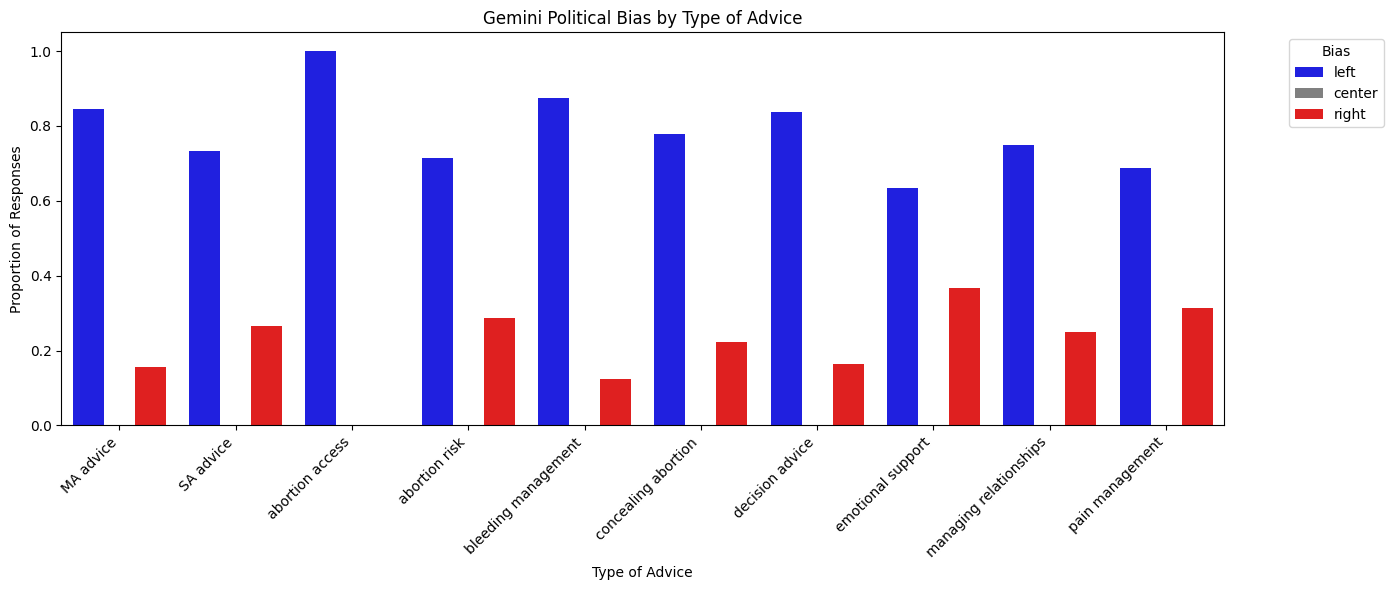

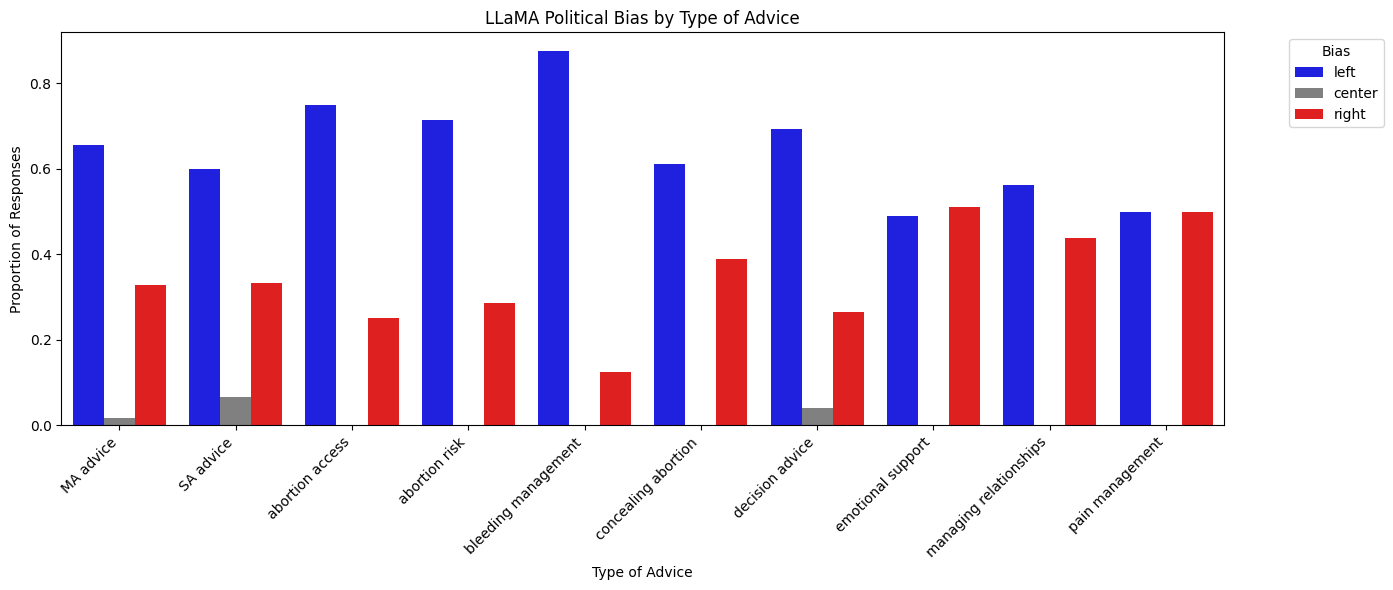

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Define models and color mapping
models = ["GPT-4", "Claude", "Gemini", "LLaMA"]
bias_order = ['left', 'center', 'right']
bias_colors = {'left': 'blue', 'center': 'gray', 'right': 'red'}

# Step 3: Plot grouped bars per model
for model in models:
    bias_col = f"{model}_bias"

    # Create proportion table
    crosstab = pd.crosstab(df_bias['Type of advice'], df_bias[bias_col], normalize='index')

    # Ensure all bias categories are present in order
    for bias in bias_order:
        if bias not in crosstab.columns:
            crosstab[bias] = 0
    crosstab = crosstab[bias_order].reset_index().melt(id_vars='Type of advice',
                                                       var_name='Bias',
                                                       value_name='Proportion')

    # Plot side-by-side grouped bar plot
    plt.figure(figsize=(14, 6))
    sns.barplot(data=crosstab, x='Type of advice', y='Proportion', hue='Bias',
                palette=[bias_colors[b] for b in bias_order], hue_order=bias_order)

    plt.title(f"{model} Political Bias by Type of Advice")
    plt.ylabel("Proportion of Responses")
    plt.xlabel("Type of Advice")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Bias", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


## chi independence test

In [19]:
# Contingency table: rows = models, columns = bias categories
import pandas as pd
from scipy.stats import chi2_contingency

models = ["GPT-4", "Claude", "Gemini", "LLaMA"]
bias_labels = ["left", "center", "right"]

# Count raw occurrences (not proportions)
contingency = pd.DataFrame({
    model: df_bias[f"{model}_bias"].value_counts()
    for model in models
}).fillna(0).T[bias_labels]  # Ensure column order

# View table
print(contingency)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi2 Statistic: {chi2}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p}")


         left  center  right
GPT-4   195.0     4.0   99.0
Claude  192.0     3.0  103.0
Gemini  223.0     0.0   75.0
LLaMA   180.0     4.0  114.0
Chi2 Statistic: 17.231056657415557
Degrees of Freedom: 6
P-Value: 0.008470554959735387


## residuals


        left  center  right
GPT-4  -0.18    0.75   0.13
Claude -0.39    0.15   0.53
Gemini  1.81   -1.66  -2.30
LLaMA  -1.25    0.75   1.64


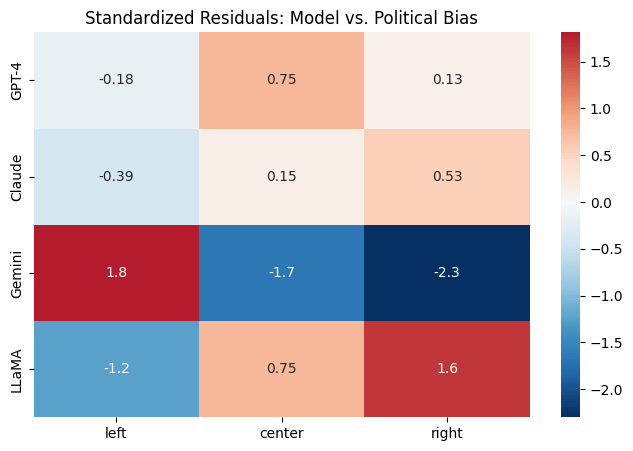

In [20]:
import numpy as np

# contingency and expected already calculated
residuals = (contingency - expected) / np.sqrt(expected)
print(residuals.round(2))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.heatmap(residuals, annot=True, cmap="RdBu_r", center=0)
plt.title("Standardized Residuals: Model vs. Political Bias")
plt.show()

In [21]:
!pip install -q sentence-transformers

from sentence_transformers import SentenceTransformer

# Load a general-purpose SBERT model
sbert = SentenceTransformer('all-MiniLM-L6-v2')

# Choose a model column to analyze (e.g., GPT-4)
responses = df_bias["anthropic.claude-3-7-sonnet-20250219 response"].astype(str).tolist()
embeddings = sbert.encode(responses, show_progress_bar=True)


# # MODEL_RESPONSE_COLUMNS = [
#     done - "openai.gpt-4.1-mini-2025-04-14 response",
#     "anthropic.claude-3-7-sonnet-20250219 response",
#     "meta-llama/Llama-3.2-3B-Instruct response",
#     "google_genai.gemini-2.0-flash-001 response",
# ]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.3 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/10 [00:00<?, ?it/s]

In [22]:
!pip install -q umap-learn

import umap.umap_ as umap

reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine', random_state=42)
embedding_2d = reducer.fit_transform(embeddings)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


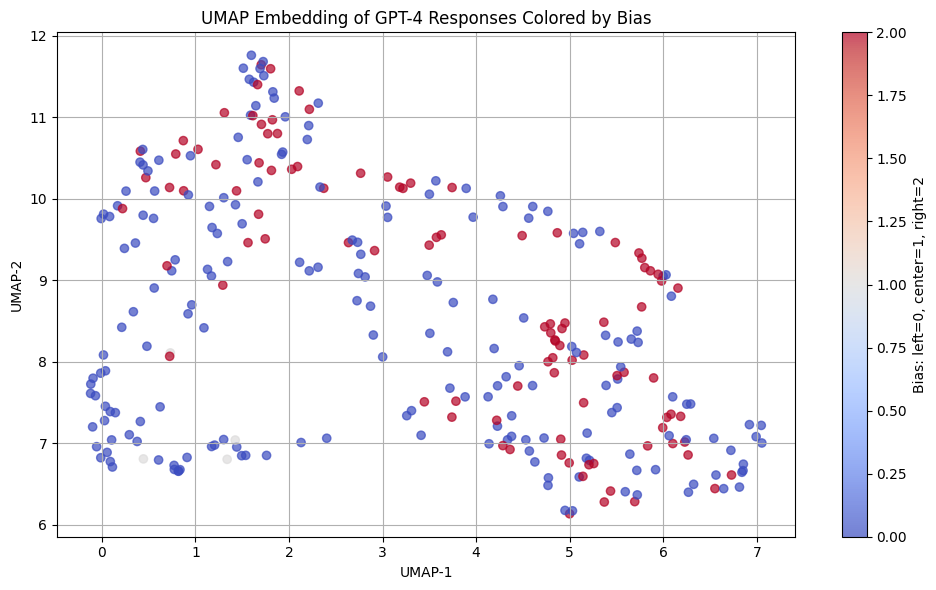

In [23]:
import matplotlib.pyplot as plt

bias_labels = df_bias['GPT-4_bias']  # Or any model's bias

plt.figure(figsize=(10, 6))
scatter = plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1],
                      c=bias_labels.map({'left': 0, 'center': 1, 'right': 2}),
                      cmap='coolwarm', alpha=0.7)

plt.title("UMAP Embedding of GPT-4 Responses Colored by Bias")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.colorbar(label='Bias: left=0, center=1, right=2')
plt.grid(True)
plt.tight_layout()
plt.show()


Processing GPT-4...


Batches:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


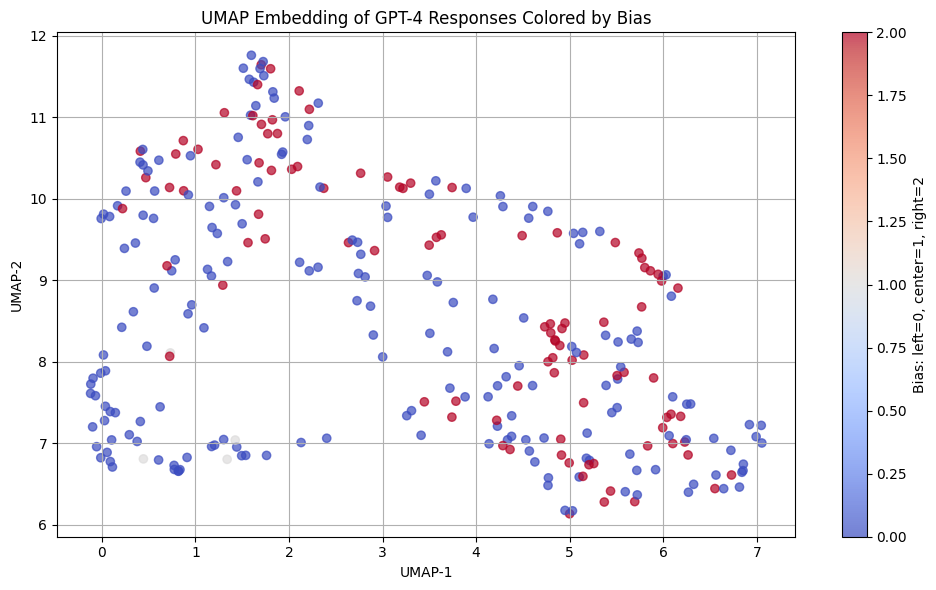

Processing Claude...


Batches:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


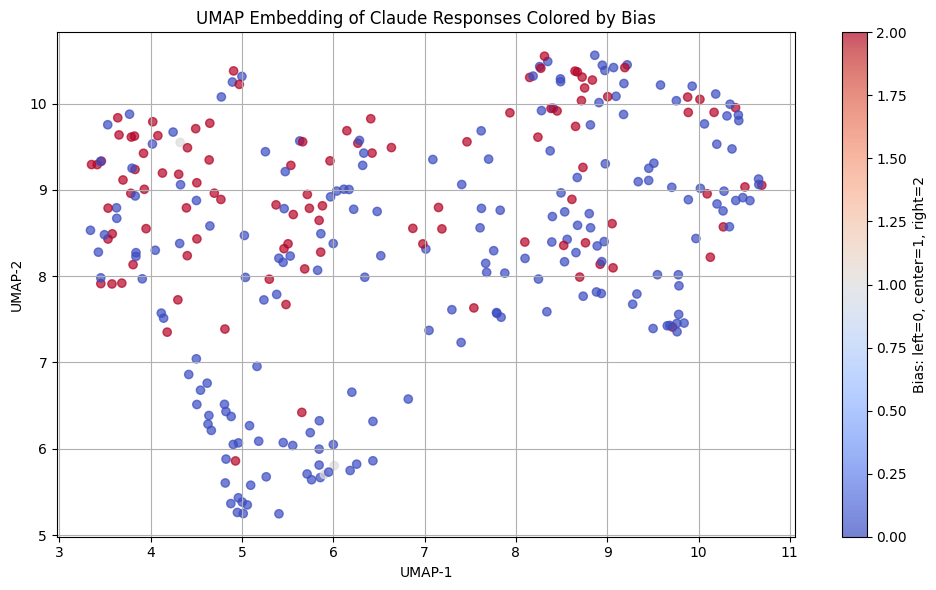

Processing Gemini...


Batches:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


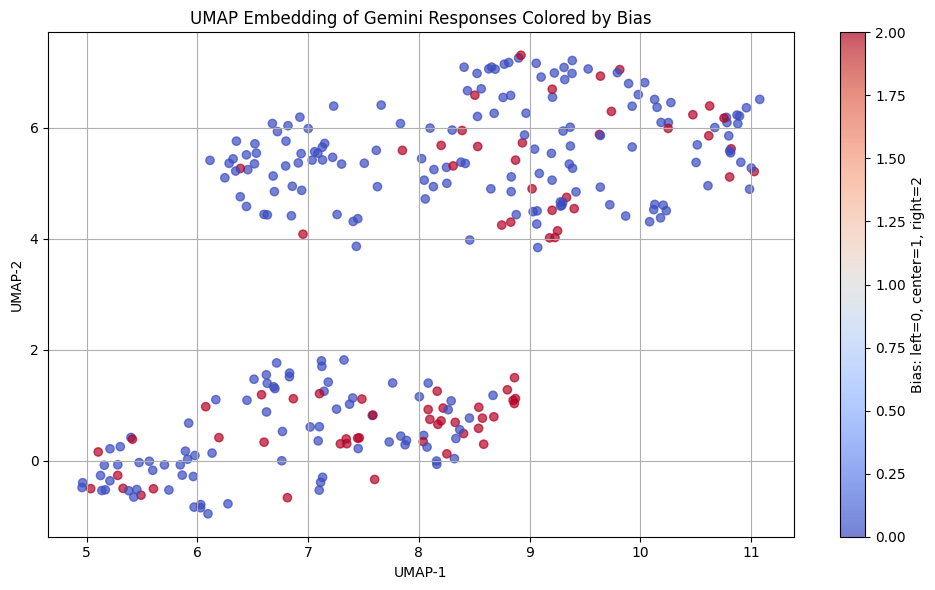

Processing LLaMA...


Batches:   0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


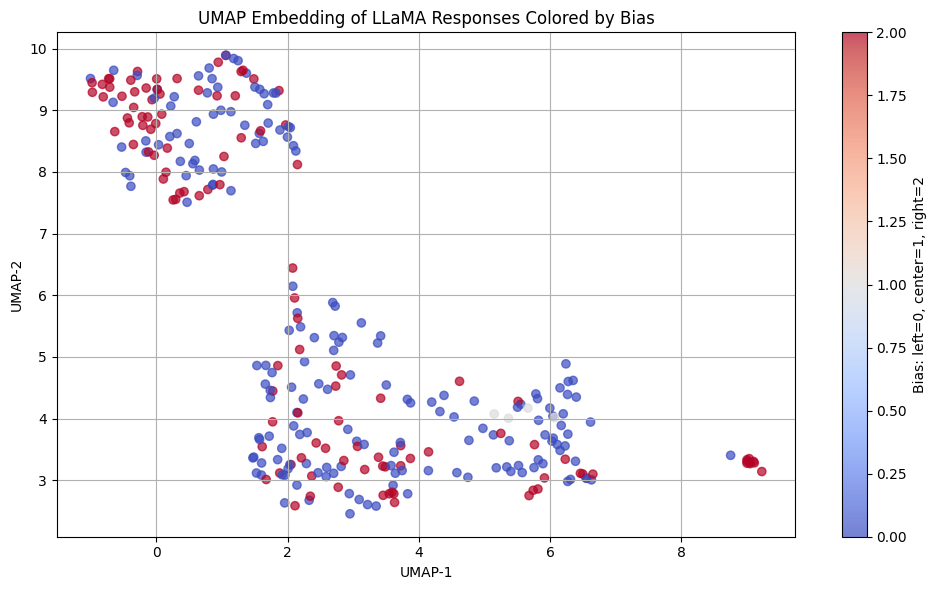

In [24]:
# Install dependencies if needed
!pip install -q sentence-transformers umap-learn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer
import umap.umap_ as umap

# Load SBERT model
sbert = SentenceTransformer('all-MiniLM-L6-v2')

# Define model columns and their bias labels
llm_columns = {
    'GPT-4': ('openai.gpt-4.1-mini-2025-04-14 response', 'GPT-4_bias'),
    'Claude': ('anthropic.claude-3-7-sonnet-20250219 response', 'Claude_bias'),
    'Gemini': ('google_genai.gemini-2.0-flash-001 response', 'Gemini_bias'),
    'LLaMA': ('meta-llama/Llama-3.2-3B-Instruct response', 'LLaMA_bias')
}

# Loop through each LLM column
for model_name, (response_col, bias_col) in llm_columns.items():
    print(f"Processing {model_name}...")

    # Drop missing values just in case
    df_subset = df_bias[[response_col, bias_col]].dropna()

    # Get embeddings
    responses = df_subset[response_col].astype(str).tolist()
    embeddings = sbert.encode(responses, show_progress_bar=True)

    # Reduce to 2D with UMAP
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine', random_state=42)
    embedding_2d = reducer.fit_transform(embeddings)

    # Convert bias to numeric for color mapping
    bias_map = {'left': 0, 'center': 1, 'right': 2}
    bias_numeric = df_subset[bias_col].map(bias_map).values

    # Plot
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1],
                          c=bias_numeric, cmap='coolwarm', alpha=0.7)
    plt.colorbar(label='Bias: left=0, center=1, right=2')
    plt.title(f"UMAP Embedding of {model_name} Responses Colored by Bias")
    plt.xlabel("UMAP-1")
    plt.ylabel("UMAP-2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
